In [62]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import ppscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Matplotlib Version : {matplotlib.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Pandas Version : 1.5.3
Numpy Version : 1.26.4
Matplotlib Version : 3.8.0
Seaborn Version : 0.13.0


In [64]:
df = pd.read_csv("marketing_campaign_data.csv")
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,S1,S1,S1,S1,S3
Marital_Status,Lajang,Lajang,Bertunangan,Bertunangan,Menikah
Income,58138000.0,46344000.0,71613000.0,26646000.0,58293000.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## **Feature Engineering**

In [66]:
#Years Now
years = datetime.now().year

#MAge
df['age'] = years - df['Year_Birth']

#Grouping Age
df.loc[(df['age']>=0) & (df['age']<12), 'age_group'] = "Kanak - Kanak"
df.loc[(df['age']>=12) & (df['age']<17), 'age_group'] = "Remaja Awal"
df.loc[(df['age']>=17) & (df['age']<26), 'age_group'] = "Remaja Akhir"
df.loc[(df['age']>=26) & (df['age']<36), 'age_group'] = "Dewasa Awal"
df.loc[(df['age']>=36) & (df['age']<46), 'age_group'] = "Dewasa Akhir"
df.loc[(df['age']>=46) & (df['age']<56), 'age_group'] = "Lansia Awal"
df.loc[(df['age']>=56) & (df['age']<66), 'age_group'] = "Lansia Akhir"
df.loc[(df['age']>=66), 'age_group'] = "Manula"

#Number of child
df['number_of_child'] = df['Kidhome'] + df['Teenhome']

#Amount of Expend
df['amount_of_expend'] = ((df['MntCoke'] + df['MntFruits']) 
                          + (df['MntMeatProducts'] + df['MntFishProducts']) 
                          + (df['MntSweetProducts'] + df['MntGoldProds']))

#Number of Transaction
df['number_of_transaction'] = ((df['NumDealsPurchases'] + df['NumWebPurchases'])
                                + (df['NumCatalogPurchases'] + df['NumStorePurchases']))

#Number of Campaign
df['number_of_campaign'] = ((df["AcceptedCmp1"] + df["AcceptedCmp1"])
                            + (df["AcceptedCmp1"] + df["AcceptedCmp1"])
                            + df["AcceptedCmp1"])

#CVR (Convertion Rate)
def cvr(x,y):
    if y == 0:
        return 0
    return x/y

df['convertion_rate'] = df.apply(lambda x : round(cvr(x['number_of_transaction'], x['NumWebVisitsMonth']), 2), axis=1)

Referensi Kelompok Umur : https://www.neliti.com/id/publications/249455/klasifikasi-kelompok-umur-manusia-berdasarkan-analisis-dimensifraktal-box-counti

In [67]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_CostContact,Z_Revenue,Response,age,age_group,number_of_child,amount_of_expend,number_of_transaction,number_of_campaign,convertion_rate
352,352,9185,1966,S3,Lajang,69759000.0,0,0,28-10-2013,38,...,3,11,1,58,Lansia Akhir,0,1029000,18,0,6.00
296,296,2874,1988,D3,Cerai,35388000.0,1,0,07-03-2013,20,...,3,11,0,36,Dewasa Akhir,1,32000,5,0,0.71
1392,1392,10146,1972,S3,Bertunangan,38887000.0,1,0,02-03-2014,17,...,3,11,0,52,Lansia Awal,1,42000,5,0,0.71
303,303,1717,1988,S1,Lajang,39747000.0,1,0,13-04-2014,43,...,3,11,0,36,Dewasa Akhir,1,273000,13,0,1.62
2120,2120,8832,1976,S2,Bertunangan,37509000.0,1,0,12-09-2012,24,...,3,11,0,48,Lansia Awal,1,123000,9,0,1.29


## **EDA (Exploratory Data Analysis)**

#### Bivariate Analysis

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2240 non-null   int64  
 1   ID                     2240 non-null   int64  
 2   Year_Birth             2240 non-null   int64  
 3   Education              2240 non-null   object 
 4   Marital_Status         2240 non-null   object 
 5   Income                 2216 non-null   float64
 6   Kidhome                2240 non-null   int64  
 7   Teenhome               2240 non-null   int64  
 8   Dt_Customer            2240 non-null   object 
 9   Recency                2240 non-null   int64  
 10  MntCoke                2240 non-null   int64  
 11  MntFruits              2240 non-null   int64  
 12  MntMeatProducts        2240 non-null   int64  
 13  MntFishProducts        2240 non-null   int64  
 14  MntSweetProducts       2240 non-null   int64  
 15  MntG

In [69]:
numerical_val = ['Income',
              'Recency',
              'Complain',
              'age',
              'number_of_child',
              'amount_of_expend',
              'number_of_transaction',
              'NumWebVisitsMonth',
              'number_of_campaign',
              'convertion_rate']

categorical_val = ['Education',
                   'Marital_Status',
                   'age_group']

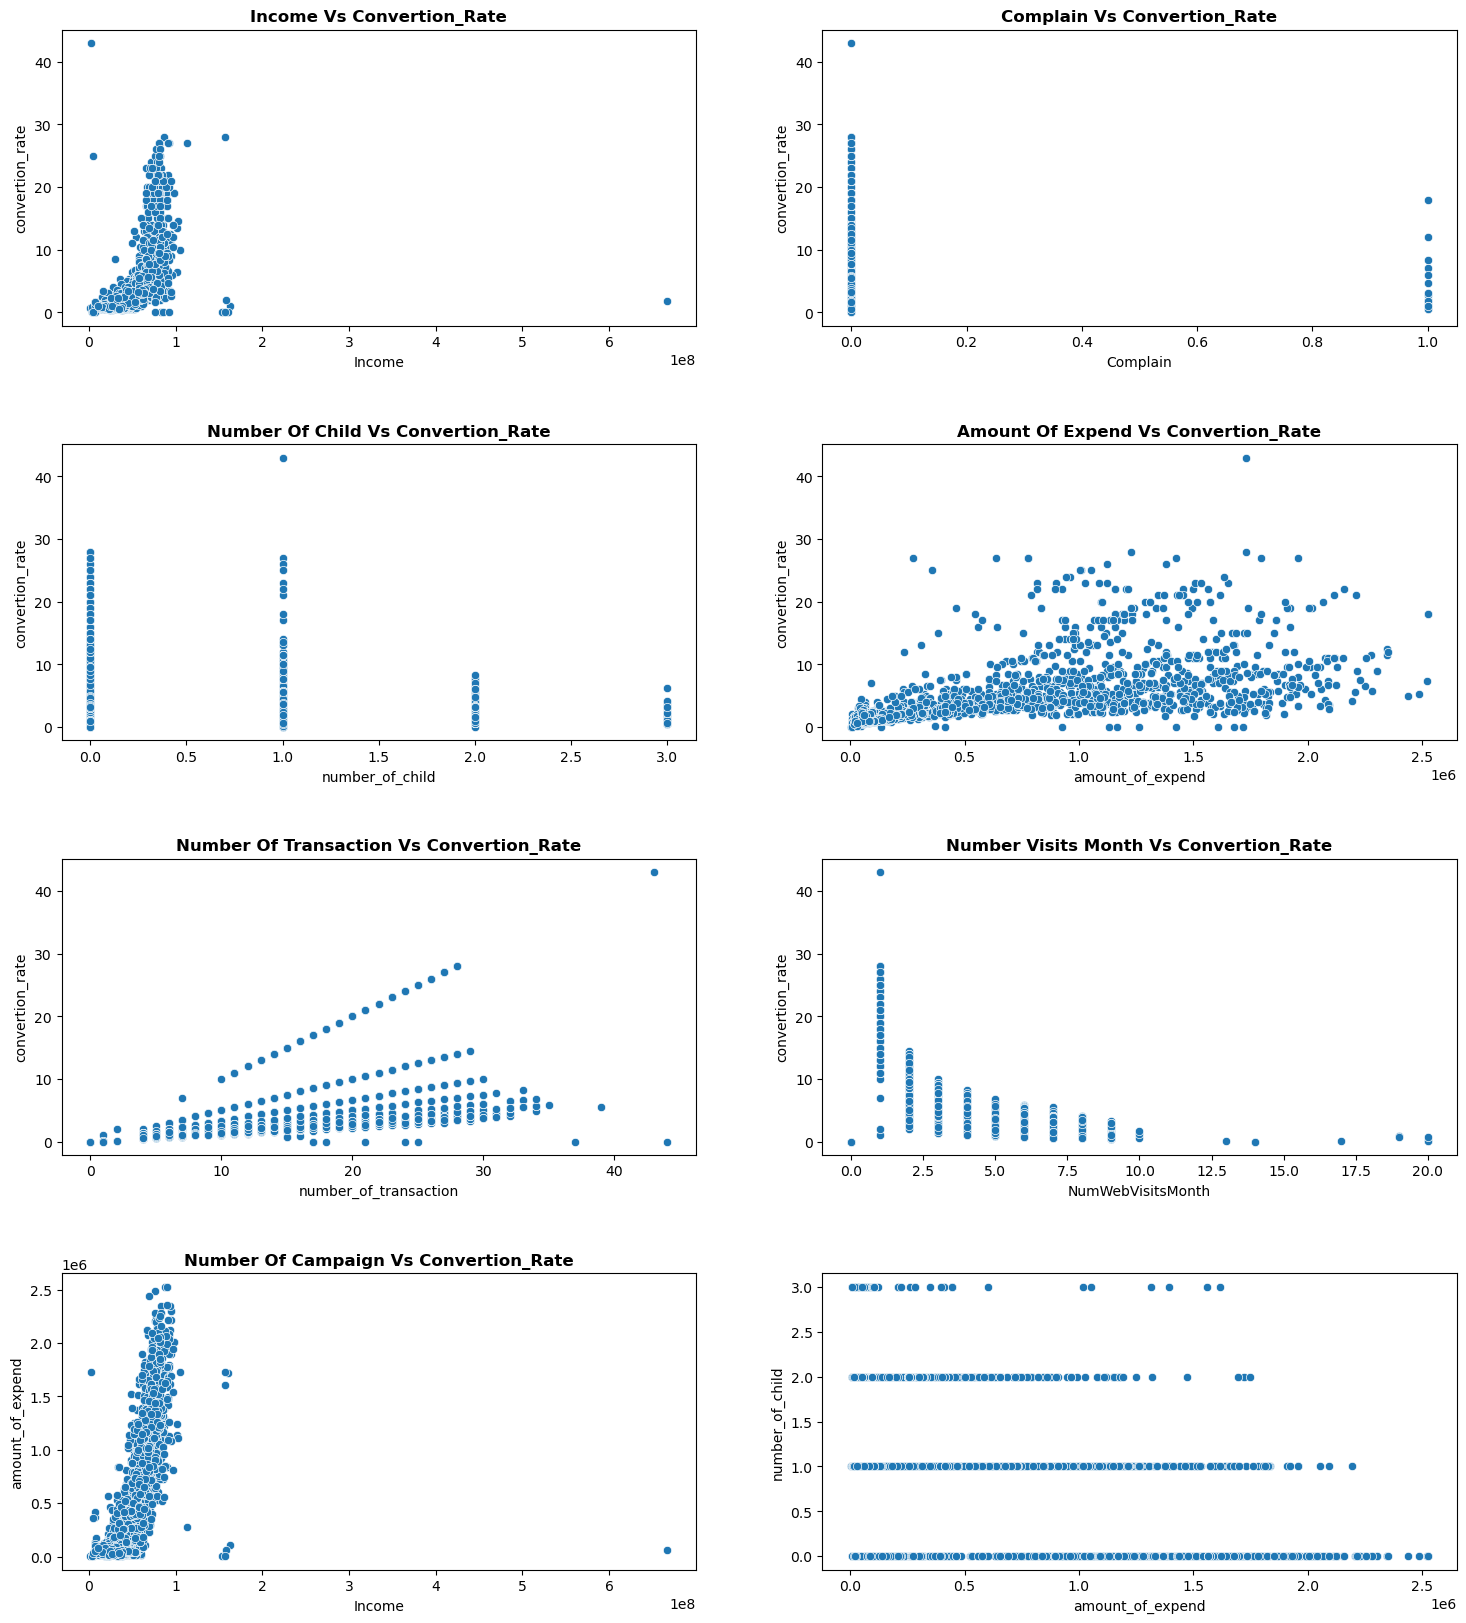

In [70]:
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.4)

sns.scatterplot(data=df[numerical_val], x='Income', y='convertion_rate', ax=axes[0][0])
axes[0][0].set_title("Income Vs Convertion_Rate", weight='bold')

sns.scatterplot(data=df[numerical_val], x='Complain', y='convertion_rate', ax=axes[0][1])
axes[0][1].set_title("Complain Vs Convertion_Rate", weight='bold')

sns.scatterplot(data=df[numerical_val], x='number_of_child', y='convertion_rate', ax=axes[1][0])
axes[1][0].set_title("Number Of Child Vs Convertion_Rate", weight='bold')

sns.scatterplot(data=df[numerical_val], x='amount_of_expend', y='convertion_rate', ax=axes[1][1])
axes[1][1].set_title("Amount Of Expend Vs Convertion_Rate", weight='bold')

sns.scatterplot(data=df[numerical_val], x='number_of_transaction', y='convertion_rate', ax=axes[2][0])
axes[2][0].set_title("Number Of Transaction Vs Convertion_Rate", weight='bold')

sns.scatterplot(data=df[numerical_val], x='NumWebVisitsMonth', y='convertion_rate', ax=axes[2][1])
axes[2][1].set_title("Number Visits Month Vs Convertion_Rate", weight='bold')

sns.scatterplot(data=df[numerical_val], x='Income', y='amount_of_expend', ax=axes[3][0])
axes[3][0].set_title("Amount Of Expend Vs Convertion_Rate", weight='bold')

sns.scatterplot(data=df[numerical_val], x='amount_of_expend', y='number_of_child', ax=axes[3][1])
axes[3][0].set_title("Number Of Campaign Vs Convertion_Rate", weight='bold')

plt.show()

#### Multivariate Analysis

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2240 non-null   int64  
 1   ID                     2240 non-null   int64  
 2   Year_Birth             2240 non-null   int64  
 3   Education              2240 non-null   object 
 4   Marital_Status         2240 non-null   object 
 5   Income                 2216 non-null   float64
 6   Kidhome                2240 non-null   int64  
 7   Teenhome               2240 non-null   int64  
 8   Dt_Customer            2240 non-null   object 
 9   Recency                2240 non-null   int64  
 10  MntCoke                2240 non-null   int64  
 11  MntFruits              2240 non-null   int64  
 12  MntMeatProducts        2240 non-null   int64  
 13  MntFishProducts        2240 non-null   int64  
 14  MntSweetProducts       2240 non-null   int64  
 15  MntG

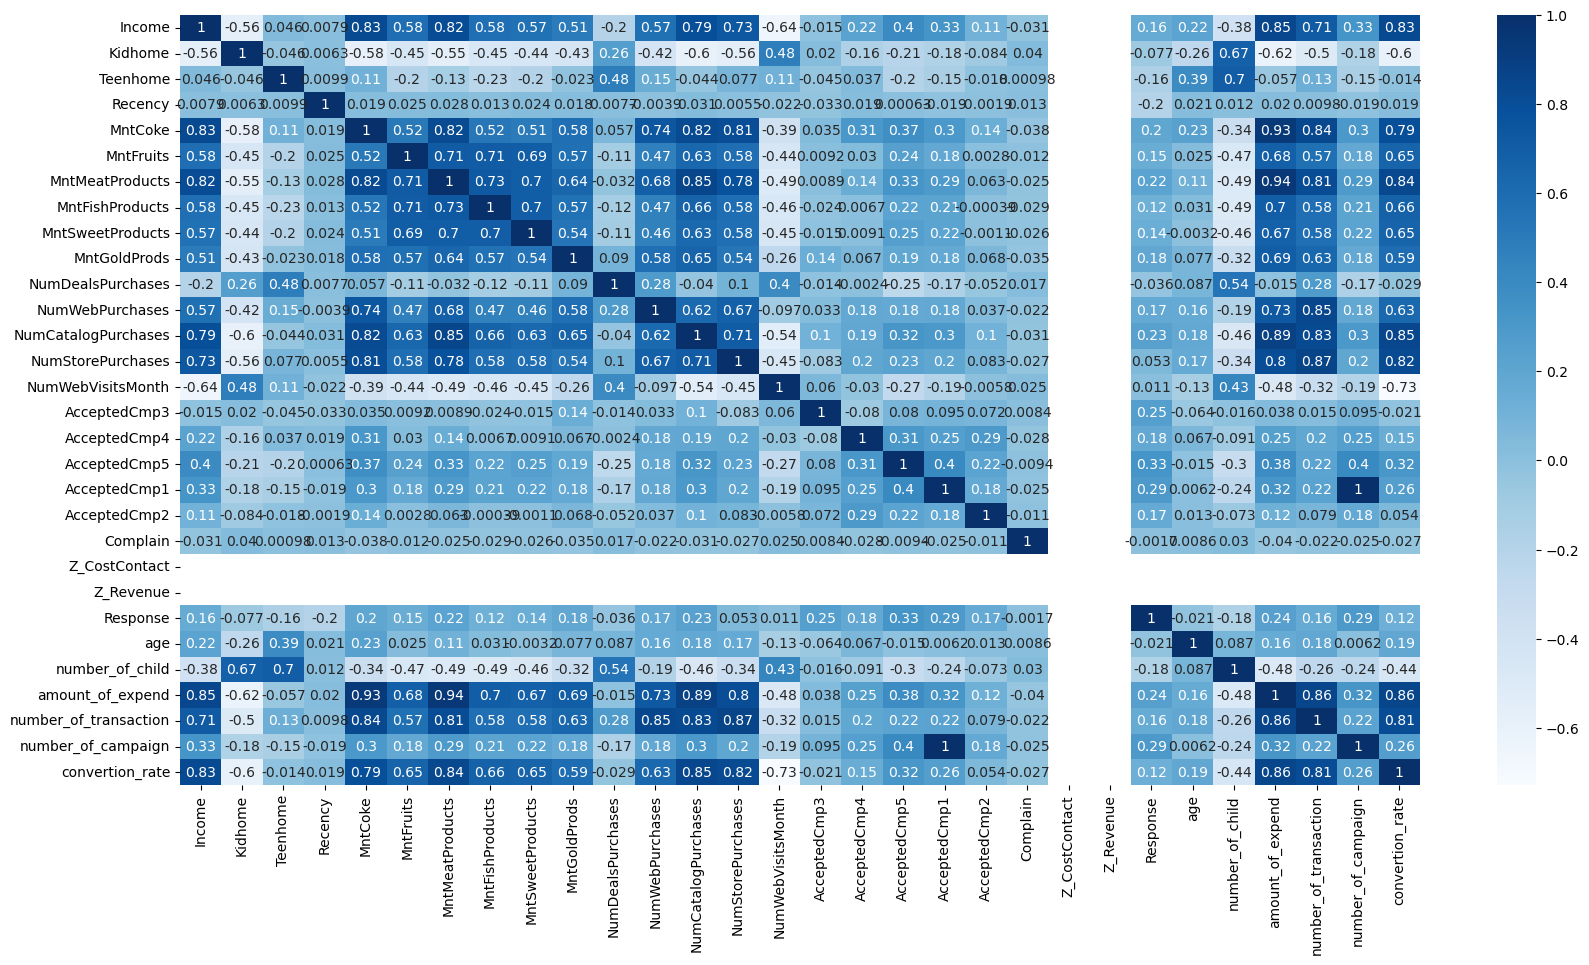

In [74]:
corr = df.drop(columns=['Unnamed: 0',
                        'ID',
                        'Year_Birth',
                        'Dt_Customer',
                        'age_group'])
df_corr = corr.corr(method='spearman')

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, cmap='Blues')

plt.show()

## **Data Cleansing & Data Preprocessing**

#### Missing Value

In [75]:
colomns_miss = corr.columns

for cek_miss in range(0, len(colomns_miss)):
    print(f"Columns : {colomns_miss[cek_miss]}")
    print(f"Number of Missing Value : {df[colomns_miss[cek_miss]].isnull().sum()}")
    print(f"Persentage of Missing Value : {round(((df[colomns_miss[cek_miss]].isnull().sum())/len(df[colomns_miss[cek_miss]]) * 100), 2)}%")
    print(f"")

Columns : Education
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : Marital_Status
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : Income
Number of Missing Value : 24
Persentage of Missing Value : 1.07%

Columns : Kidhome
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : Teenhome
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : Recency
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : MntCoke
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : MntFruits
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : MntMeatProducts
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : MntFishProducts
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : MntSweetProducts
Number of Missing Value : 0
Persentage of Missing Value : 0.0%

Columns : MntGoldProds
Number of Missing Value : 0
Persentag

In [76]:
print(f"Number of Duplicated Data : {corr.duplicated().sum()}")

Number of Duplicated Data : 183


##### Unique Value

In [77]:
#Unique Value
for uniq_num in corr.columns:
    print(f"Columns : {uniq_num}")
    print(f"Unique Value : {corr[uniq_num].unique()}")
    print("")

Columns : Education
Unique Value : ['S1' 'S3' 'S2' 'SMA' 'D3']

Columns : Marital_Status
Unique Value : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

Columns : Income
Unique Value : [58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]

Columns : Kidhome
Unique Value : [0 1 2]

Columns : Teenhome
Unique Value : [0 1 2]

Columns : Recency
Unique Value : [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

Columns : MntCoke
Unique Value : [ 635000   11000  426000  173000  520000  235000   76000   14000   28000
    5000    6000  194000  233000    3000 1006000   53000   84000 1012000
    4000   86000    1000  867000  384000  270000   36000  684000    8000
  112000  110000   96000  482000   40000  702000   55000  437

##### Handling Missing Value

In [78]:
df = corr.dropna()

for val_miss in range(0, len(colomns_miss)):
    if df[colomns_miss[val_miss]].isnull().sum() != 0:
        print(f"Colomns : {colomns_miss[val_miss]}")
        print(f"Total Missing Value : {df[colomns_miss[val_miss]].isnull().sum()}")
        print(f"Persentase Missing Value : {round(((df[colomns_miss[val_miss]].isnull().sum()/df.shape[0])*100), 2)}%")
        print("")
    else :
        print("Tidak Ada Missing Value")
        break;


Tidak Ada Missing Value


##### Feature Encoding

In [79]:
#Label Encoder
df['Education'] = df['Education'].replace({'SMA' : 0,
                                            'D3' : 1,
                                            'S1' : 2,
                                            'S2' : 3,
                                            'S3' : 4})

df['Marital_Status'] = df['Marital_Status'].replace({'Lajang' : 2, 
                                                     'Bertunangan' : 2, 
                                                     'Menikah' : 2, 
                                                     'Cerai' : 1, 
                                                     'Janda' : 1, 
                                                     'Duda' : 0})

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,2.459838e+00,1.004825e+00,0.0,2.00,2.00,3.0,4.0
Marital_Status,2216.0,1.858303e+00,3.526790e-01,0.0,2.00,2.00,2.0,2.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.00,68522000.0,666666000.0
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.00,0.00,1.0,2.0
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.00,0.00,1.0,2.0
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,24.00,49.00,74.0,99.0
MntCoke,2216.0,3.050916e+05,3.373279e+05,0.0,24000.00,174500.00,505000.0,1493000.0
MntFruits,2216.0,2.635605e+04,3.979392e+04,0.0,2000.00,8000.00,33000.0,199000.0
MntMeatProducts,2216.0,1.669959e+05,2.242833e+05,0.0,16000.00,68000.00,232250.0,1725000.0
MntFishProducts,2216.0,3.763764e+04,5.475208e+04,0.0,3000.00,12000.00,50000.0,259000.0


#### Feature Scaling

In [81]:

df_scaling = df.copy()

#Feature Scaling With StandardScaler
df_scaling['Education'] = StandardScaler().fit_transform(df_scaling['Education'].values.reshape(-1,1))
df_scaling['Income'] = StandardScaler().fit_transform(df_scaling['Income'].values.reshape(-1,1))
df_scaling['Recency'] = StandardScaler().fit_transform(df_scaling['Recency'].values.reshape(-1,1))
df_scaling['MntCoke'] = StandardScaler().fit_transform(df_scaling['MntCoke'].values.reshape(-1,1))
df_scaling['MntFruits'] = StandardScaler().fit_transform(df_scaling['MntFruits'].values.reshape(-1,1))
df_scaling['MntMeatProducts'] = StandardScaler().fit_transform(df_scaling['MntMeatProducts'].values.reshape(-1,1))
df_scaling['MntFishProducts'] = StandardScaler().fit_transform(df_scaling['MntFishProducts'].values.reshape(-1,1))
df_scaling['MntSweetProducts'] = StandardScaler().fit_transform(df_scaling['MntSweetProducts'].values.reshape(-1,1))
df_scaling['MntGoldProds'] = StandardScaler().fit_transform(df_scaling['MntGoldProds'].values.reshape(-1,1))
df_scaling['NumDealsPurchases'] = StandardScaler().fit_transform(df_scaling['NumDealsPurchases'].values.reshape(-1,1))
df_scaling['NumWebPurchases'] = StandardScaler().fit_transform(df_scaling['NumWebPurchases'].values.reshape(-1,1))
df_scaling['NumCatalogPurchases'] = StandardScaler().fit_transform(df_scaling['NumCatalogPurchases'].values.reshape(-1,1))
df_scaling['NumStorePurchases'] = StandardScaler().fit_transform(df_scaling['NumStorePurchases'].values.reshape(-1,1))
df_scaling['NumWebVisitsMonth'] = StandardScaler().fit_transform(df_scaling['NumWebVisitsMonth'].values.reshape(-1,1))
df_scaling['age'] = StandardScaler().fit_transform(df_scaling['age'].values.reshape(-1,1))
df_scaling['number_of_child'] = StandardScaler().fit_transform(df_scaling['number_of_child'].values.reshape(-1,1))
df_scaling['amount_of_expend'] = StandardScaler().fit_transform(df_scaling['amount_of_expend'].values.reshape(-1,1))
df_scaling['number_of_transaction'] = StandardScaler().fit_transform(df_scaling['number_of_transaction'].values.reshape(-1,1))
df_scaling['number_of_campaign'] = StandardScaler().fit_transform(df_scaling['number_of_campaign'].values.reshape(-1,1))
df_scaling['convertion_rate'] = StandardScaler().fit_transform(df_scaling['convertion_rate'].values.reshape(-1,1))

In [82]:
df_scaling.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,1.410825e-16,1.000226,-2.448579,-0.457733,-0.457733,0.537690,1.533113
Marital_Status,2216.0,1.858303e+00,0.352679,0.000000,2.000000,2.000000,2.000000,2.000000
Income,2216.0,1.122247e-16,1.000226,-2.007250,-0.673262,-0.034400,0.646660,24.413282
Kidhome,2216.0,4.417870e-01,0.536896,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2216.0,5.054152e-01,0.544181,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2216.0,-2.404815e-18,1.000226,-1.693488,-0.864239,-0.000437,0.863365,1.727167
MntCoke,2216.0,-9.378779e-17,1.000226,-0.904640,-0.833477,-0.387223,0.592757,3.522319
MntFruits,2216.0,5.851717e-17,1.000226,-0.662463,-0.612193,-0.461382,0.166997,4.339430
MntMeatProducts,2216.0,-4.649309e-17,1.000226,-0.744744,-0.673390,-0.441488,0.291011,6.948158
MntFishProducts,2216.0,1.603210e-17,1.000226,-0.687574,-0.632770,-0.468355,0.225839,4.043907


<Axes: >

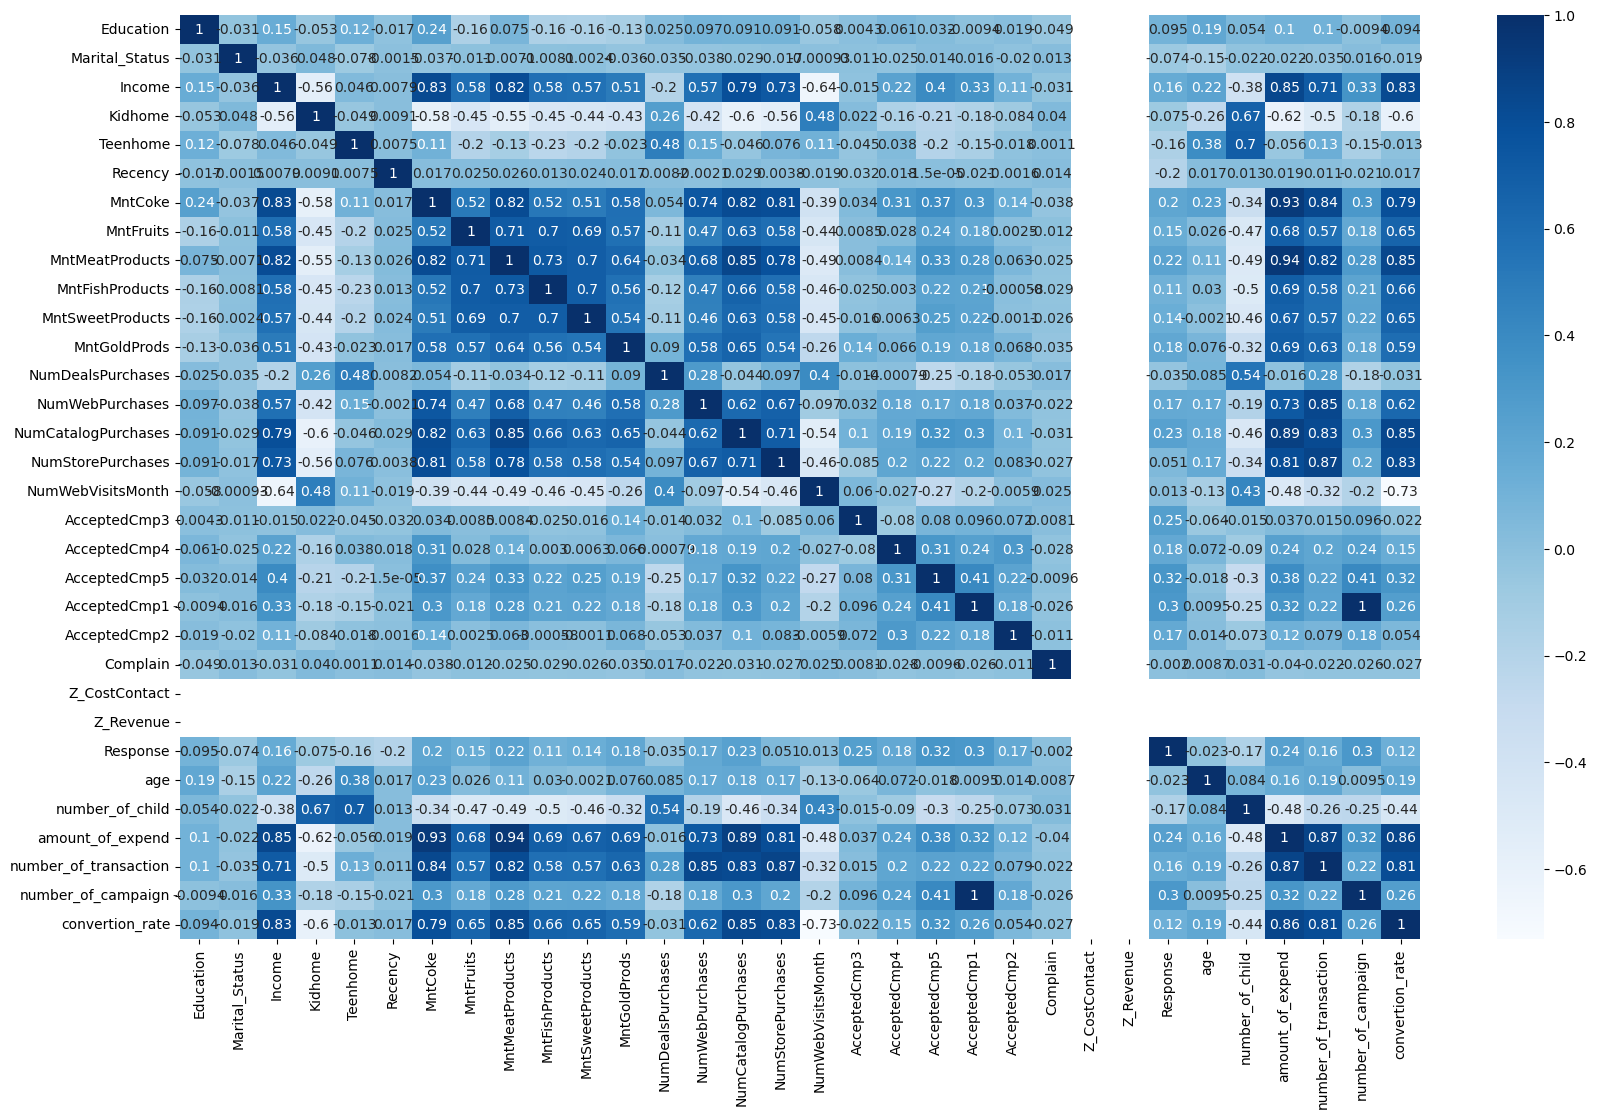

In [83]:
correlation_data = df_scaling.corr(method='spearman')
plt.figure(figsize=(20,12))
sns.heatmap(data=correlation_data, annot=True, cmap='Blues')

#### Feature Selection

In [ ]:
df_cluster = df_scaling.drop(columns=['Education',
                                      'Marital_Status',
                                      'Teenhome',
                                      'Recency',
                                      'AcceptedCmp1',
                                      'AcceptedCmp2',
                                      'AcceptedCmp3',
                                      'AcceptedCmp4',
                                      'AcceptedCmp5',
                                      'Complain',
                                      'Z_CostContact',
                                      'Z_Revenue',
                                      'Response',
                                      'age'])

## **Training Model**

In [84]:
#Function Elbow Method
def elbow_method(x, max_n=10):
    elbow = []
    for i in range(2, max_n+1):
        kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
        kmeans.fit(x)
        elbow.append(kmeans.inertia_)
    return elbow

#Function Silhoutte Score
def silhoutte_score(x, max_n=10):
    silhoutte = []
    for i in range(2, max_n+1):
        kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
        cluster_label = kmeans.fit_predict(x)
        silhoutte_avg = silhouette_score(x, cluster_label)
        silhoutte.append(silhoutte_avg)
    return silhoutte

In [85]:
score = {
    'Elbow' : elbow_method(df_cluster),
    'Silhoutte_Score' : silhoutte_score(df_cluster)
}

In [86]:
#DataFrame Clustering Result
data_cluster = pd.DataFrame(score, index=range(2, 11)).rename_axis('K')
data_cluster.reset_index()

,K,Elbow,Silhoutte_Score
0,2,23753.298621,0.385137
1,3,20089.880836,0.313502
2,4,18351.350654,0.313768
3,5,17248.041286,0.268604
4,6,16487.446607,0.268557
5,7,15724.744418,0.235335
6,8,15042.710956,0.178043
7,9,14772.490188,0.169670
8,10,14410.700036,0.169110


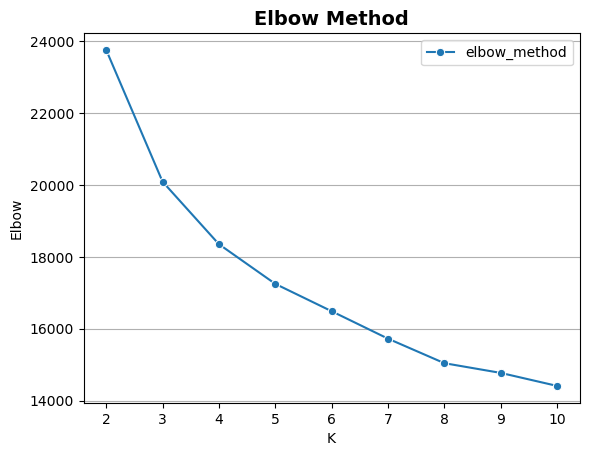

In [144]:
#Visualization Elbow Method
sns.lineplot(data_cluster['Elbow'], marker="o")
plt.title("Elbow Method", weight='bold', fontsize=14)
plt.legend(loc= 'upper right', labels=['elbow_method'])
plt.grid(axis='y')

plt.show()

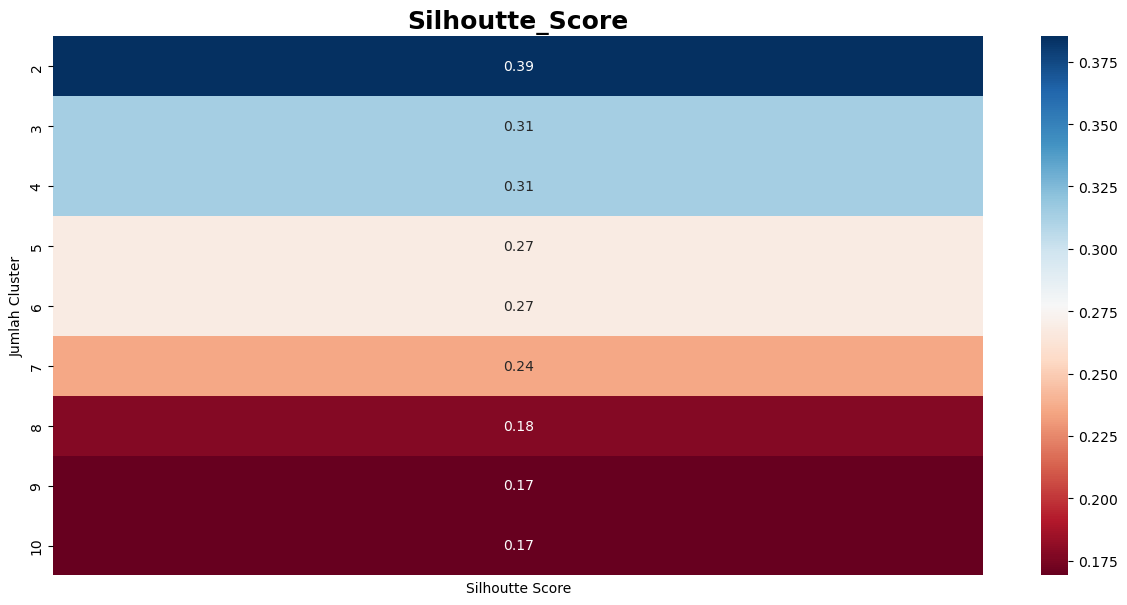

In [89]:
#Pivot Tabel for Silhoutte_Score
df_sil = data_cluster.reset_index()
pivot_tab = df_sil.pivot_table(index='K', values='Silhoutte_Score')

#Visualization Heatmap Silhoutte_Score
plt.figure(figsize=(15,7))
sns.heatmap(data=pivot_tab, annot=True, fmt='.2', cmap='RdBu')
plt.xticks([])
plt.xlabel("Silhoutte Score")
plt.ylabel("Jumlah Cluster")
plt.title('Silhoutte_Score', weight='bold', fontsize=18)

plt.show()

#### Training Model With Final Cluster

In [90]:
#Train Model With Final Cluster (Analysis Result)
Kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = Kmeans.fit_predict(df_cluster)

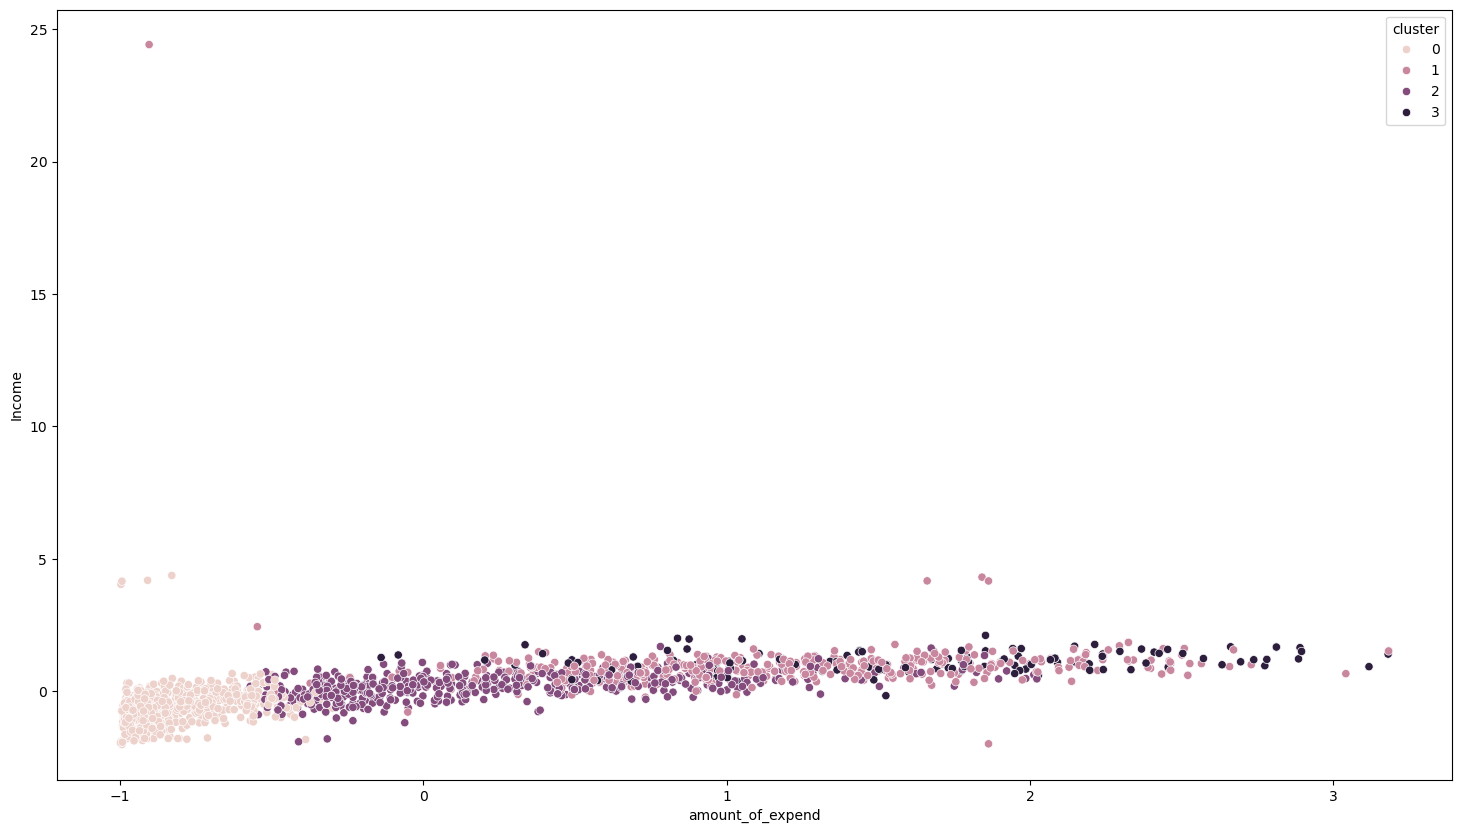

In [94]:
df_cluster_new =df_cluster.copy()
df_cluster_new['cluster'] = cluster_labels
df['cluster'] = cluster_labels

#Visualization Cluster By Income & Amount Of Expend
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_cluster_new, x='amount_of_expend', y='Income', hue='cluster')

plt.show()

In [96]:
group_cluster = {0 : 'Risk of Churn',
                 1 : 'Mid Spender',
                 2 : 'Low Spender',
                 3 : 'High Spender'}

#Replace (Label Encoder) Cluster Columns
df['cluster'] = df['cluster'].map(group_cluster)

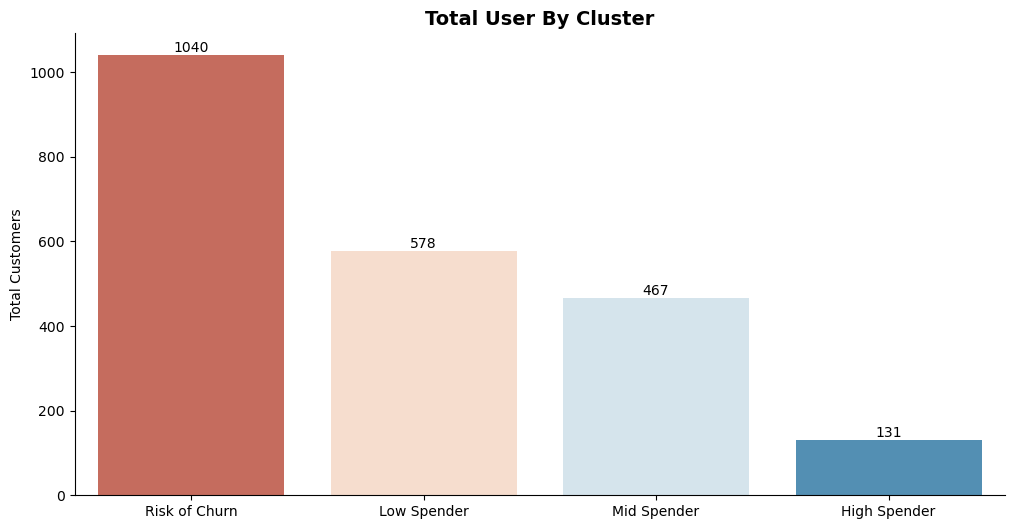

In [98]:
#Visualization Total User By Cluster
plt.figure(figsize=(12, 6))
vis = sns.barplot(df['cluster'].value_counts(), palette='RdBu')
sns.despine()
plt.ylabel("Total Customers")
plt.title("Total User By Cluster", weight='bold', fontsize=14)

for plot_vis in vis.patches:
    vis.annotate(int(plot_vis.get_height()), 
                (plot_vis.get_x() + plot_vis.get_width()/2, plot_vis.get_height()),
                 va='center', ha='center',
                 xytext=(0,5),
                 textcoords='offset points')

plt.show()

## **Business Insight**

In [126]:
df_grup = df.groupby('cluster')['Income',
                                'NumWebVisitsMonth',
                                'number_of_child',
                                'amount_of_expend',
                                'number_of_transaction',
                                'convertion_rate'].describe()
df_grup.T

cluster                      High Spender   Low Spender   Mid Spender  \
Income                count  1.310000e+02  5.780000e+02  4.670000e+02   
                      mean   8.078316e+07  5.734047e+07  7.600506e+07   
                      std    9.294917e+06  1.104786e+07  2.987892e+07   
                      min    4.819200e+07  4.428000e+06  2.447000e+06   
                      25%    7.538900e+07  5.061100e+07  6.855700e+07   
                      50%    8.039500e+07  5.788650e+07  7.453800e+07   
                      75%    8.725750e+07  6.501075e+07  8.101950e+07   
                      max    1.054710e+08  9.487100e+07  6.666660e+08   
NumWebVisitsMonth     count  1.310000e+02  5.780000e+02  4.670000e+02   
                      mean   3.206107e+00  5.903114e+00  2.721627e+00   
                      std    1.800502e+00  1.787970e+00  1.734410e+00   
                      min    1.000000e+00  0.000000e+00  0.000000e+00   
                      25%    2.000000e+00  5.000000e+00  1.000000e+00   
                      50%    3.000000e+00  6.000000e+00  2.000000e+00   
                      75%    4.000000e+00  7.000000e+00  4.000000e+00   
                      max    9.000000e+00  1.000000e+01  8.000000e+00   
number_of_child       count  1.310000e+02  5.780000e+02  4.670000e+02   
                      mean   1.908397e-01  1.153979e+00  2.676660e-01   
                      std    4.317140e-01  5.964886e-01  4.575118e-01   
                      min    0.000000e+00  0.000000e+00  0.000000e+00   
                      25%    0.000000e+00  1.000000e+00  0.000000e+00   
                      50%    0.000000e+00  1.000000e+00  0.000000e+00   
                      75%    0.000000e+00  1.000000e+00  1.000000e+00   
                      max    2.000000e+00  3.000000e+00  2.000000e+00   
amount_of_expend      count  1.310000e+02  5.780000e+02  4.670000e+02   
                      mean   1.563672e+06  7.300294e+05  1.320379e+06   
                      std    4.435284e+05  3.303741e+05  3.963881e+05   
                      min    5.230000e+05  2.310000e+05  6.200000e+04   
                      25%    1.214500e+06  4.600000e+05  1.029000e+06   
                      50%    1.572000e+06  6.560000e+05  1.291000e+06   
                      75%    1.864500e+06  9.280000e+05  1.587500e+06   
                      max    2.524000e+06  1.826000e+06  2.525000e+06   
number_of_transaction count  1.310000e+02  5.780000e+02  4.670000e+02   
                      mean   2.141221e+01  2.106228e+01  2.091435e+01   
                      std    4.404316e+00  4.497979e+00  4.763635e+00   
                      min    1.200000e+01  1.000000e+01  1.000000e+01   
                      25%    1.800000e+01  1.700000e+01  1.700000e+01   
                      50%    2.100000e+01  2.000000e+01  2.000000e+01   
                      75%    2.450000e+01  2.400000e+01  2.400000e+01   
                      max    3.500000e+01  3.900000e+01  4.400000e+01   
convertion_rate       count  1.310000e+02  5.780000e+02  4.670000e+02   
                      mean   9.034809e+00  3.961176e+00  1.030101e+01   
                      std    5.316001e+00  1.797860e+00  6.207338e+00   
                      min    1.710000e+00  0.000000e+00  0.000000e+00   
                      25%    5.225000e+00  2.750000e+00  5.750000e+00   
                      50%    7.670000e+00  3.620000e+00  8.500000e+00   
                      75%    1.150000e+01  4.810000e+00  1.325000e+01   
                      max    2.700000e+01  2.500000e+01  4.300000e+01   

cluster                      Risk of Churn  
Income                count   1.040000e+03  
                      mean    3.515400e+07  
                      std     1.444538e+07  
                      min     1.730000e+06  
                      25%     2.604150e+07  
                      50%     3.473300e+07  
                      75%     4.290400e+07  
                      max     1.623970e+08  
NumWebVisitsMonth

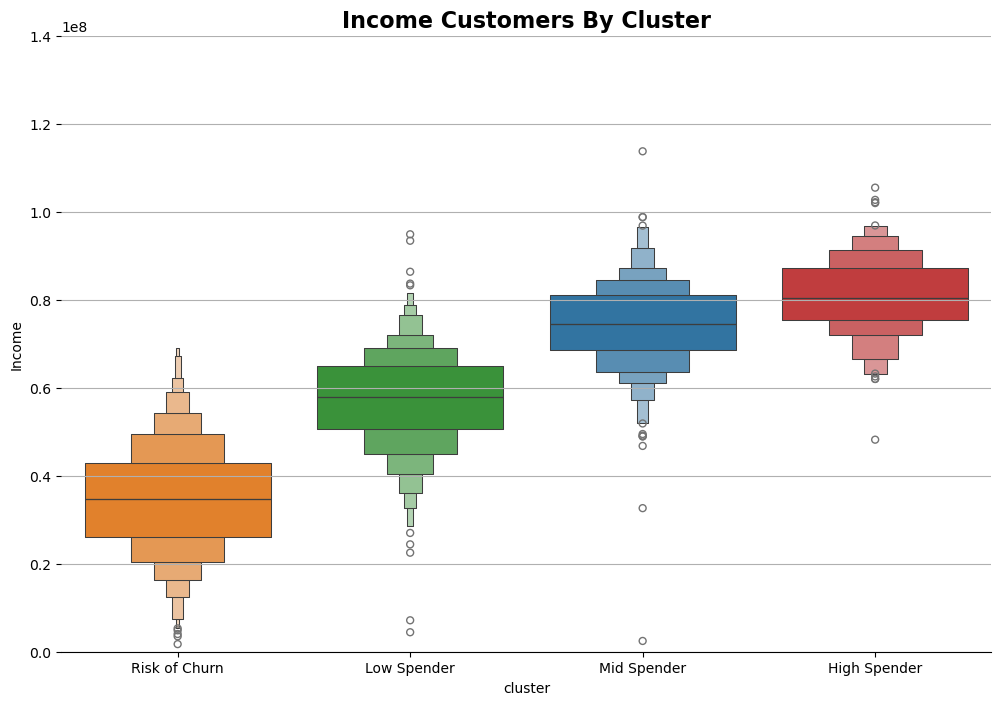

In [136]:
#Visualization Income Customers By Cluster
plt.figure(figsize=(12,8))
order = ['Risk of Churn', 'Low Spender', 'Mid Spender', 'High Spender']
sns.boxenplot(df, x='cluster', y='Income', hue='cluster', order=order)
sns.despine(left=True)
plt.title("Income Customers By Cluster", weight='bold', fontsize=16)
plt.ylim(0, 140000000)
plt.grid(axis='y')

plt.show()

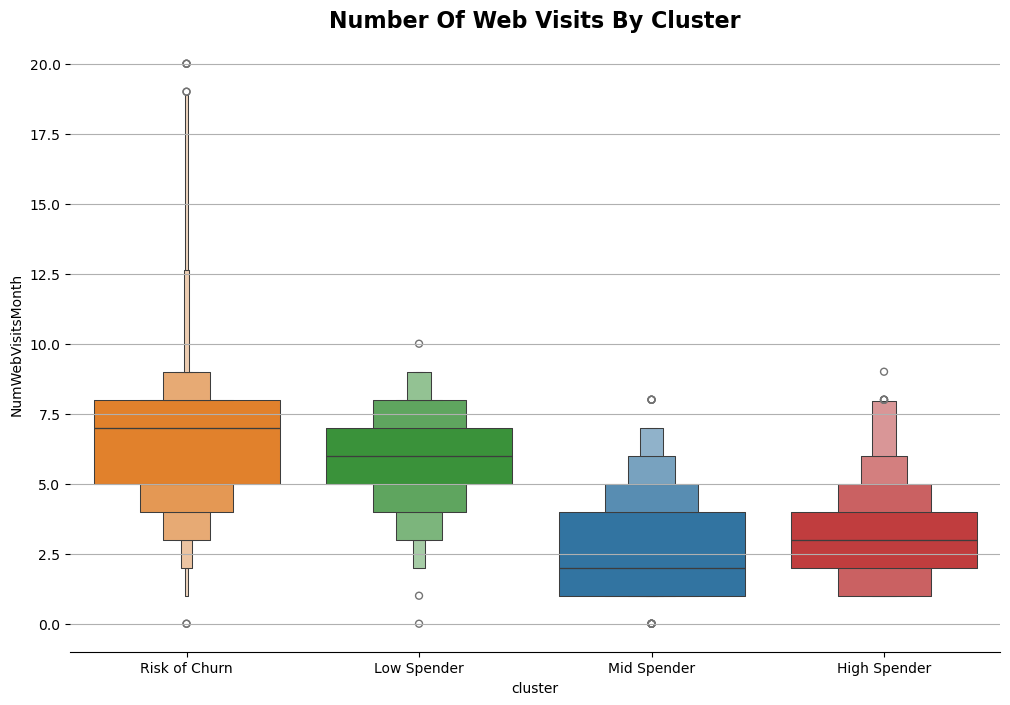

In [137]:
#Visualization Number of Web Visits By Cluster
plt.figure(figsize=(12,8))
sns.boxenplot(df, x='cluster', y='NumWebVisitsMonth', hue='cluster', order=order)
sns.despine(left=True)
plt.title("Number Of Web Visits By Cluster", weight='bold', fontsize=16)
plt.grid(axis='y')

plt.show()

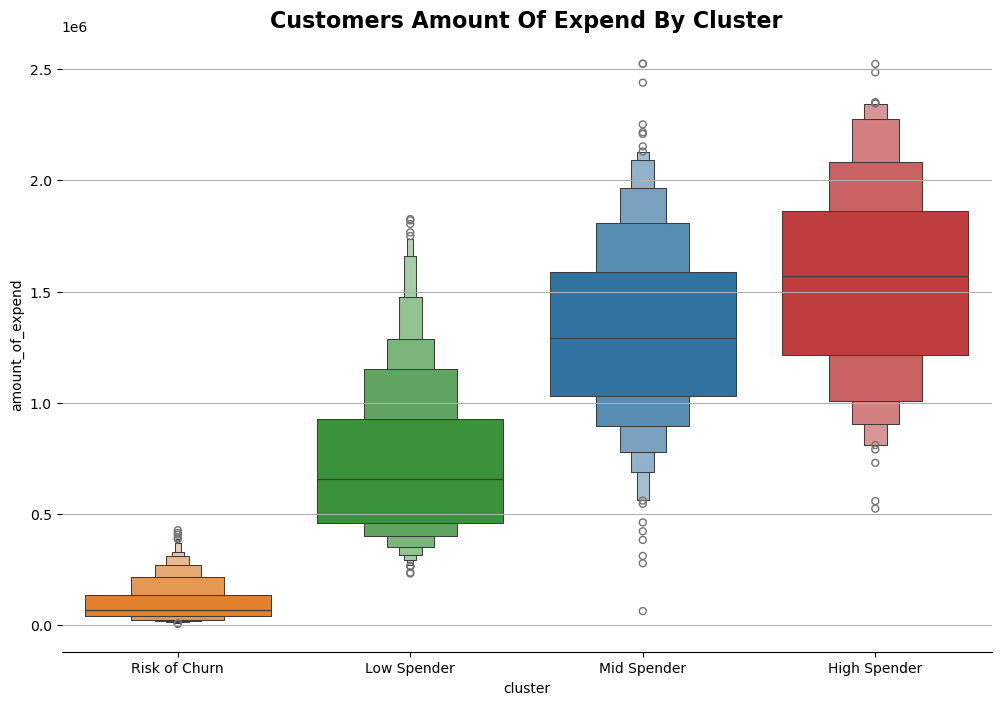

In [145]:
#Visualization Customers Amount Of Expend By Cluster
plt.figure(figsize=(12,8))
sns.boxenplot(df, x='cluster', y='amount_of_expend', hue='cluster', order=order)
sns.despine(left=True)
plt.title("Customers Amount Of Expend By Cluster", weight='bold', fontsize=16)
plt.grid(axis='y')

plt.show()

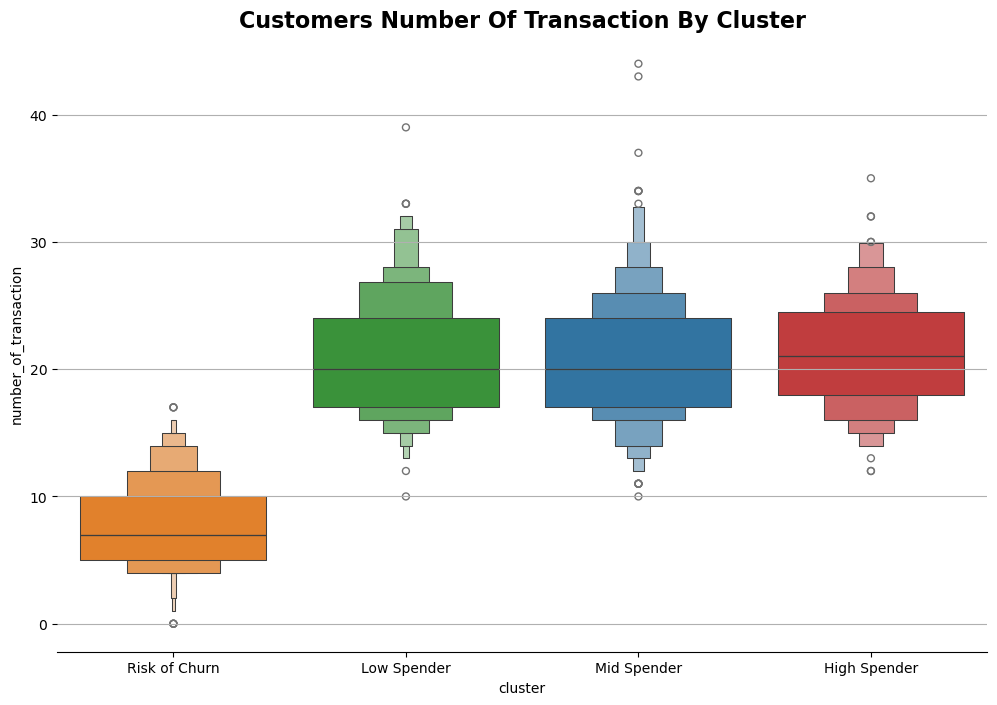

In [139]:
#Visualization Customers Number of Transaction By Cluster
plt.figure(figsize=(12,8))
sns.boxenplot(df, x='cluster', y='number_of_transaction', hue='cluster', order=order)
sns.despine(left=True)
plt.title("Customers Number Of Transaction By Cluster", weight='bold', fontsize=16)
plt.grid(axis='y')

plt.show()

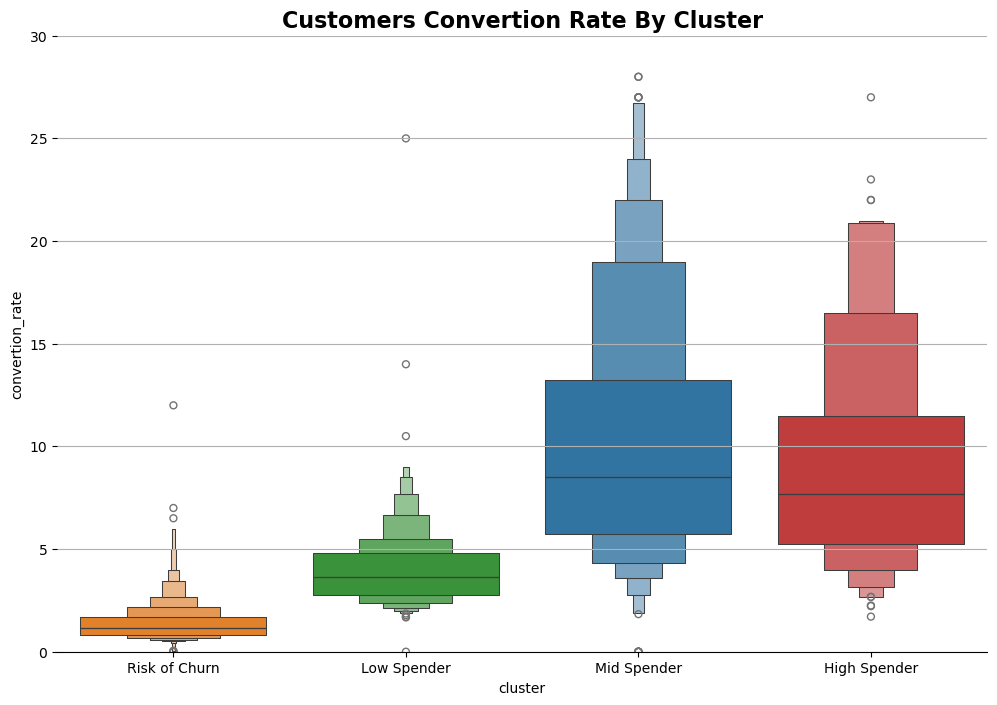

In [143]:
#isualization Customers Convertion Rate By Cluster
plt.figure(figsize=(12,8))
sns.boxenplot(df, x='cluster', y='convertion_rate', hue='cluster', order=order)
sns.despine(left=True)
plt.title("Customers Convertion Rate By Cluster", weight='bold', fontsize=16)
plt.ylim(0,30)
plt.grid(axis='y')

plt.show()